In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.formula.api as sm

%matplotlib inline


In [2]:
df = pd.read_csv("bus_data/cleaned_data/line15.csv", low_memory=False, header=None)
df.columns = ["Timestamp", "LineID", "Direction", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Operator", "Congestion", "Lon", "Lat", 
              "Delay", "BlockID", "VehicleID", "StopID", "AtStop"]


In [3]:
df.shape


(4858123, 15)

In [4]:
df.dtypes

Timestamp             int64
LineID              float64
Direction             int64
JourneyPatternID     object
TimeFrame            object
VehicleJourneyID      int64
Operator             object
Congestion            int64
Lon                 float64
Lat                 float64
Delay                 int64
BlockID               int64
VehicleID             int64
StopID               object
AtStop                int64
dtype: object

In [5]:

df.head(10)

Timestamp  LineID  Direction JourneyPatternID   TimeFrame  \
0  1352160000000000    15.0          0         00150001  2012-11-05   
1  1352160004000000    15.0          0         00151001  2012-11-05   
2  1352160004000000    15.0          0         015A1001  2012-11-05   
3  1352160010000000    15.0          0         00150001  2012-11-05   
4  1352160012000000    15.0          0         015A0001  2012-11-05   
5  1352160017000000    15.0          0             null  2012-11-05   
6  1352160019000000    15.0          0         00150001  2012-11-05   
7  1352160023000000    15.0          0         00151001  2012-11-05   
8  1352160023000000    15.0          0         015A1001  2012-11-05   
9  1352160031000000    15.0          0         00150001  2012-11-05   

   VehicleJourneyID Operator  Congestion       Lon        Lat  Delay  BlockID  \
0              5826       RD           0 -6.258584  53.340099   -361    15013   
1              5929       HN           0 -6.162066  53.402668    401    15105   
2              3118       RD           0 -6.236166  53.342152      0    15010   
3              5843       RD           0 -6.323327  53.277756   -463    15021   
4              3130       RD           0 -6.328856  53.304470   -106    15009   
5              3339       RD           0 -6.322704  53.271786      0    15029   
6              5826       RD           0 -6.257967  53.342365   -361    15013   
7              5929       HN           0 -6.162233  53.401867    401    15105   
8              3118       RD           0 -6.234233  53.341999      0    15010   
9              5843       RD           0 -6.327923  53.276974   -490    15021   

   VehicleID StopID  AtStop  
0      33210   4870       0  
1      33502   6317       1  
2      33469   2499       0  
3      33254   4869       0  
4      33020   1102       0  
5      33484   6280       0  
6      33210   4870       0  
7      33502   6317       1  
8      33469   2499       0  
9      33254   4869       0

In [6]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns


In [7]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   

In [8]:
# Convert some features to categorical
for column in ['LineID', 'VehicleJourneyID', 'Congestion', 'BlockID', 'VehicleID', 'AtStop']:
    df[column] = df[column].astype('category')

In [9]:
# Convert Unix timestamp to datetime

# Take uneccesary trailing zeroes off of unix timestamp. 
df['Timestamp'] = df['Timestamp'].apply(lambda x: x//1000000)

# Convert the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')



In [10]:
# Add day of week column
df['Day'] = df['Timestamp'].dt.dayofweek

In [11]:
# Add hour of day column
df['Hour'] = df['Timestamp'].dt.hour

In [12]:
# Descriptive stats for categorical features
df.select_dtypes(['category']).describe().T

count unique         top         freq
LineID            4.85812e+06      1          15  4.85812e+06
JourneyPatternID      4858030     17    00150001      1310971
TimeFrame             4858123     57  2013-01-11       105417
VehicleJourneyID      4858123   4082        2693         8570
Operator              4858123      7          RD      3585969
Congestion            4858123      2           0      4737920
BlockID               4858123     59       15105       168777
VehicleID             4858123    212       33547        94944
StopID                4858122    250        6282       299478
AtStop                4858123      2           0      3653530

In [13]:
# Descriptive stats for continuous features
df.describe().T

count       mean         std           min         25%  \
Direction  4858123.0   0.000000    0.000000      0.000000    0.000000   
Lon        4858123.0  -6.261115    0.051383     -6.539633   -6.302107   
Lat        4858123.0  53.331749    0.040705     53.165367   53.303101   
Delay      4858123.0 -54.784313  474.658858 -14136.000000 -246.000000   
Day        4858123.0   2.580288    1.770447      0.000000    1.000000   
Hour       4858123.0  13.808374    4.874727      0.000000   10.000000   

                 50%        75%           max  
Direction   0.000000   0.000000      0.000000  
Lon        -6.264140  -6.235311     -6.100584  
Lat        53.333462  53.348286     53.421665  
Delay       0.000000  84.000000  10882.000000  
Day         3.000000   4.000000      6.000000  
Hour       14.000000  18.000000     23.000000

In [15]:
journey_patterns = df['JourneyPatternID'].unique()

In [17]:
for pattern in journey_patterns:
    print(pattern)

00150001
00151001
015A1001
015A0001
null
nan
015B0002
015B1001
015A0002
015B0001
015B1002
015B0003
00151002
00150002
029A1001
066A0001
00400001
056A1001


In [86]:
vehicledf = df[(df.VehicleID == 33210) & (df.AtStop == 1) & (df.TimeFrame == "2012-11-07")]
# vehicledf = vehicledf.drop_duplicates('StopID')

In [87]:
vehicledf

Timestamp LineID  Direction JourneyPatternID   TimeFrame  \
110866 2012-11-07 07:29:44   15.0          0             null  2012-11-07   
110921 2012-11-07 07:30:05   15.0          0         00150001  2012-11-07   
110964 2012-11-07 07:30:25   15.0          0         00150001  2012-11-07   
110997 2012-11-07 07:30:44   15.0          0         00150001  2012-11-07   
111052 2012-11-07 07:31:04   15.0          0         00150001  2012-11-07   
111093 2012-11-07 07:31:24   15.0          0         00150001  2012-11-07   
111128 2012-11-07 07:31:43   15.0          0         00150001  2012-11-07   
111181 2012-11-07 07:32:03   15.0          0         00150001  2012-11-07   
111221 2012-11-07 07:32:24   15.0          0         00150001  2012-11-07   
111275 2012-11-07 07:32:46   15.0          0         00150001  2012-11-07   
111448 2012-11-07 07:34:04   15.0          0         00150001  2012-11-07   
111497 2012-11-07 07:34:26   15.0          0         00150001  2012-11-07   
111529 2012-11-07 07:34:45   15.0          0         00150001  2012-11-07   
112269 2012-11-07 07:40:23   15.0          0         00150001  2012-11-07   
112309 2012-11-07 07:40:44   15.0          0         00150001  2012-11-07   
112536 2012-11-07 07:42:24   15.0          0         00150001  2012-11-07   
112578 2012-11-07 07:42:45   15.0          0         00150001  2012-11-07   
113013 2012-11-07 07:46:06   15.0          0         00150001  2012-11-07   
113055 2012-11-07 07:46:26   15.0          0         00150001  2012-11-07   
113271 2012-11-07 07:48:07   15.0          0         00150001  2012-11-07   
113428 2012-11-07 07:49:24   15.0          0         00150001  2012-11-07   
113593 2012-11-07 07:50:44   15.0          0         00150001  2012-11-07   
114023 2012-11-07 07:54:03   15.0          0         00150001  2012-11-07   
114150 2012-11-07 07:55:05   15.0          0         00150001  2012-11-07   
114356 2012-11-07 07:56:43   15.0          0         00150001  2012-11-07   
114565 2012-11-07 07:58:24   15.0          0         00150001  2012-11-07   
114779 2012-11-07 08:00:05   15.0          0         00150001  2012-11-07   
114825 2012-11-07 08:00:25   15.0          0         00150001  2012-11-07   
114856 2012-11-07 08:00:44   15.0          0         00150001  2012-11-07   
115122 2012-11-07 08:02:45   15.0          0         00150001  2012-11-07   
...                    ...    ...        ...              ...         ...   
203048 2012-11-07 22:27:51   15.0          0         015A1001  2012-11-07   
203064 2012-11-07 22:28:10   15.0          0         015A1001  2012-11-07   
203077 2012-11-07 22:28:28   15.0          0         015A1001  2012-11-07   
203097 2012-11-07 22:28:50   15.0          0         015A1001  2012-11-07   
203111 2012-11-07 22:29:09   15.0          0         015A1001  2012-11-07   
203129 2012-11-07 22:29:29   15.0          0         015A1001  2012-11-07   
203148 2012-11-07 22:29:49   15.0          0         015A1001  2012-11-07   
203287 2012-11-07 22:32:28   15.0          0         015A1001  2012-11-07   
203343 2012-11-07 22:33:29   15.0          0         015A1001  2012-11-07   
203493 2012-11-07 22:36:10   15.0          0         015A1001  2012-11-07   
203919 2012-11-07 22:43:51   15.0          0         015A1001  2012-11-07   
204134 2012-11-07 22:47:49   15.0          0         015A1001  2012-11-07   
204498 2012-11-07 22:54:49   15.0          0         015A1001  2012-11-07   
206279 2012-11-07 23:28:22   15.0          0         015A0001  2012-11-07   
206294 2012-11-07 23:28:36   15.0          0         015A0001  2012-11-07   
206311 2012-11-07 23:28:52   15.0          0         015A0001  2012-11-07   
206325 2012-11-07 23:29:11   15.0          0         015A0001  2012-11-07   
206347 2012-11-07 23:29:37   15.0          0         015A0001  2012-11-07   
206361 2012-11-07 23:29:51   15.0          0         015A0001  2012-11-07   
206375 2012-11-07 23:30:12   15.0          0         015A0001  2012-11-07   
206390 2012-1

In [88]:
df15 = df[(df.JourneyPatternID == '00150001')]

In [89]:
stops = df15.drop_duplicates('StopID')
stops = stops['StopID']
stops = stops.reset_index(drop='True')

In [90]:
stops.shape

(104,)

In [91]:
stopdict = {}
for stop in stops:
    row = df[df.StopID == stop].iloc[0]
    stopdict[stop] = [row["Lon"], row["Lat"]]

In [94]:
stopdict

{'1014': [-6.2584050000000016, 53.334229000000001],
 '1015': [-6.260815, 53.332771000000001],
 '1016': [-6.2643409999999999, 53.330353000000002],
 '1017': [-6.2645300000000015, 53.328831000000008],
 '1018': [-6.2648250000000001, 53.327114000000002],
 '1019': [-6.2650880000000004, 53.325721999999999],
 '1020': [-6.265244, 53.324890000000003],
 '1069': [-6.265523, 53.323273],
 '1076': [-6.2661190000000015, 53.321762],
 '1077': [-6.2669190000000015, 53.321529000000012],
 '1078': [-6.2694999999999999, 53.318568999999997],
 '1079': [-6.2718800000000003, 53.315219999999997],
 '1080': [-6.2721489999999998, 53.314835000000002],
 '1081': [-6.2743449999999985, 53.311970000000002],
 '1082': [-6.277374, 53.311408999999998],
 '1083': [-6.2808780000000004, 53.310543000000003],
 '1085': [-6.2840550000000004, 53.309722999999998],
 '1121': [-6.2854530000000004, 53.309090000000012],
 '1122': [-6.2902440000000004, 53.306122000000002],
 '1123': [-6.2932540000000001, 53.304256000000002],
 '1124': [-6.29630

In [14]:
df["Congestion"] = df[column].astype('int64')

In [15]:
continuous_features = ["Timestamp", "LonWGS84", "LatWGS84", "Delay", "Congestion"]

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

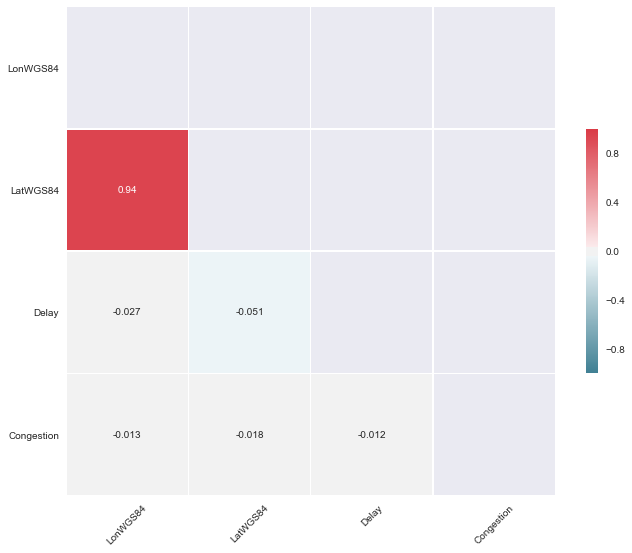

In [16]:
# Calculate correlation of all pairs of continuous features
corr = df[continuous_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

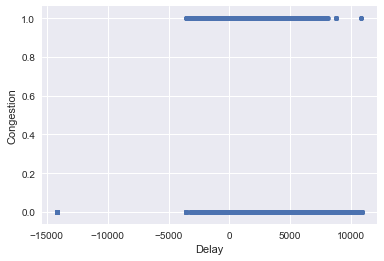

In [19]:
df.plot(kind='scatter', x='Delay', y='Congestion')
# plt.savefig("images/congestion_delay_scatter.png")

In [20]:
categorical_columns = ["LineID", "JourneyPatternID", "TimeFrame", "VehicleJourneyID", 
                       "Operator", "Congestion", "BlockID", "VehicleID", "StopID", "AtStop"]
# for col in categorical_columns:
#     df[col].value_counts().plot(kind='bar')

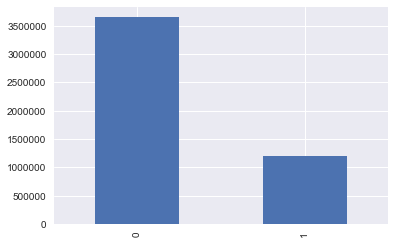

In [21]:
df['Congestion'].value_counts().plot(kind='bar')
# plt.savefig("images/congestion_bar.png")

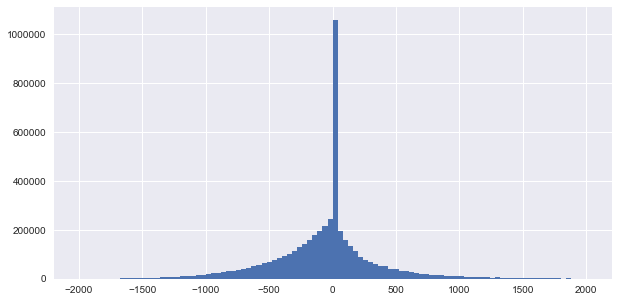

In [22]:
df["Delay"].hist(figsize=(10, 5), bins=100, range=[-2000, 2000])
# plt.savefig('images/delay_hist.png')

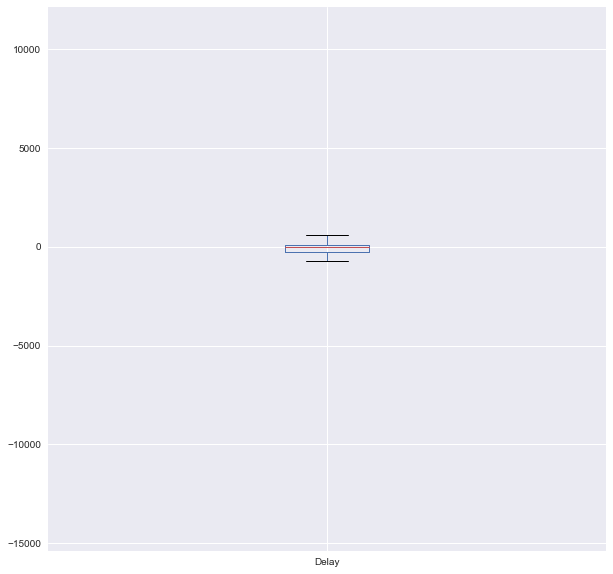

In [23]:
plt.figure(figsize=(10, 10))
df["Delay"].plot(kind='box')

In [24]:
def stacked_plot(clean_df, f1, f2):
    # Compare f2 and f1

    # Find unique values in f2
    featured = pd.unique(clean_df[f2].ravel())

    # Insert a new column called 'percent' and fill it with 0s
    clean_df['percent'] = 0

    # Iterate through the unique values in f2 and for each value count the amount of f1
    # Find the indexes of each row with a particular value and for each of these row insert count * 100 in the percent column
    for c in featured:
        count = 1 / clean_df[clean_df[f2] == c].count()[f1]
        index_list = clean_df[clean_df[f2] == c].index.tolist()
        for i in index_list:
            clean_df.loc[i, 'percent'] = count * 100

    # Group dataframe by ShipsFromCountry and IsWinner and sum percent
    group = clean_df[['percent',f2,f1]].groupby([f2,f1]).sum()
    
    # Plot values of group in a stacked bar chart
    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f1 + " by " +  f2, figsize=(15,7))

    # Define label colours and text and add to the plot
    red_patch = mpatches.Patch(color='green', label=f1)
    blue_patch = mpatches.Patch(color='blue', label="Not " + f1)
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # Define x and y labels and min and max values for the y axis
    my_plot.set_xlabel(f2)
    my_plot.set_ylabel("% " + f1)
    my_plot.set_ylim([0,100])

In [25]:
# Group by day of week and hour of day, get mean 
# hd_delay = df.groupby([df["Timestamp"].dt.dayofweek, df["Timestamp"].dt.hour])["Delay"].mean()


In [26]:
groups = df.groupby([df["Timestamp"].dt.dayofweek, df["Timestamp"].dt.hour])["Delay"].mean()

In [27]:
type(groups)

pandas.core.series.Series

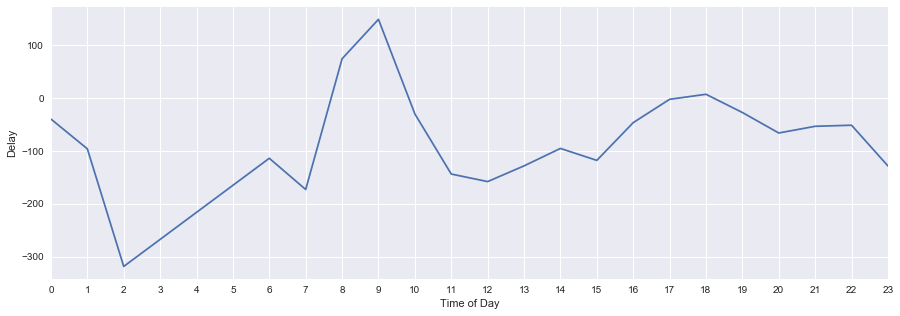

In [28]:
hourly_delay = df.groupby(['Hour'])["Delay"].mean().plot(figsize=(15,5))

hourly_delay.set(xlabel="Time of Day", ylabel="Delay")
hourly_delay.set_xticks([x for x in range(24)])
hourly_delay.set_xticklabels([x for x in range(24)])

[<matplotlib.text.Text at 0x1163551d0>, <matplotlib.text.Text at 0x116306400>]

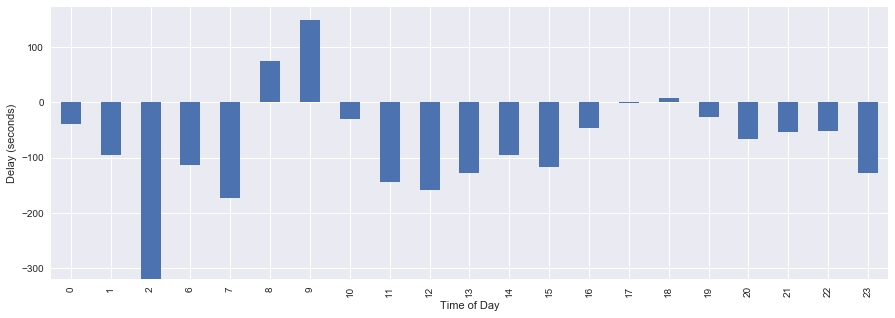

In [29]:
hourly_delay = df.groupby(['Hour'])["Delay"].mean().plot(figsize=(15,5), kind='bar')

hourly_delay.set(xlabel="Time of Day", ylabel="Delay (seconds)")

# plt.savefig("hourly_delay_bar.png")

In [30]:
days = df.groupby(["Day"])


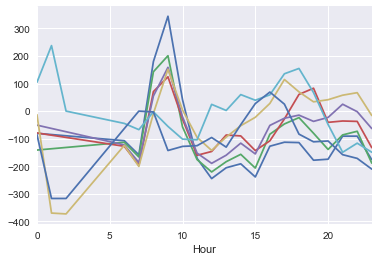

In [31]:
for name, day in days:
    
    hours = day.groupby(["Hour"])["Delay"].mean().plot()
#     hours["Delay"].mean().hist()

In [32]:
df.groupby["Hour"]

TypeError: 'method' object is not subscriptable

In [ ]:
groups.hist(figsize=(10, 5))


In [ ]:
for group in hd_delay:
    print(group)
    print()